<a href="https://colab.research.google.com/github/Gayathri-S-github/Codegnan-Datascience-Materials/blob/master/FDPDS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt,seaborn as sns
import datetime as dt
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

In [0]:
#Reading the data
covid = pd.read_csv("covid_19_data.csv")
covid.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [0]:
print("Size/Shape of the dataset",covid.shape)
print("Checking Null values",covid.isnull().sum())

Size/Shape of the dataset (26713, 8)
Checking Null values SNo                    0
ObservationDate        0
Province/State     13831
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [0]:
print("Checking data-type",covid.dtypes)

Checking data-type SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [0]:
#Dropping the column
covid.drop(["SNo"],axis=1,inplace=True)
covid.isnull().sum()

ObservationDate        0
Province/State     13831
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [0]:
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])

In [0]:
covid["ObservationDate"]

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
26708   2020-05-19
26709   2020-05-19
26710   2020-05-19
26711   2020-05-19
26712   2020-05-19
Name: ObservationDate, Length: 26713, dtype: datetime64[ns]

In [0]:
#Data Analysis
#Grouping different types of cases as per the date
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum",
                                                   "Recovered":"sum",
                                                   "Deaths":"sum"})

In [0]:
print("Basic Information")
print("Total number of confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Death cases around the world",datewise["Deaths"].iloc[-1])

Basic Information
Total number of confirmed cases around the world 4897492.0
Total number of Recovered cases around the world 1688619.0
Total number of Death cases around the world 323285.0


In [0]:
print("Total Number of Active Cases around the world",(datewise["Confirmed"].iloc[-1]-
                                                       datewise["Recovered"].iloc[-1]-
                                                       datewise["Deaths"].iloc[-1]))
print("Total Number of Closed Cases around the world",(datewise["Recovered"].iloc[-1]+
                                                       datewise["Deaths"].iloc[-1]))

Total Number of Active Cases around the world 2885588.0
Total Number of Closed Cases around the world 2011904.0


In [0]:
print("Number of Confirmed Cases in last 24hours",datewise["Confirmed"].iloc[-1]-
      datewise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours:",datewise["Recovered"].iloc[-2]-
      datewise["Recovered"].iloc[-1])
print("Number of Death Cases in last 24hours",datewise["Deaths"].iloc[-1]-
      datewise["Deaths"].iloc[-2])

Number of Confirmed Cases in last 24hours 95549.0
Number of Recovered Cases in last 24 hours: 98256.0
Number of Death Cases in last 24hours 4804.0


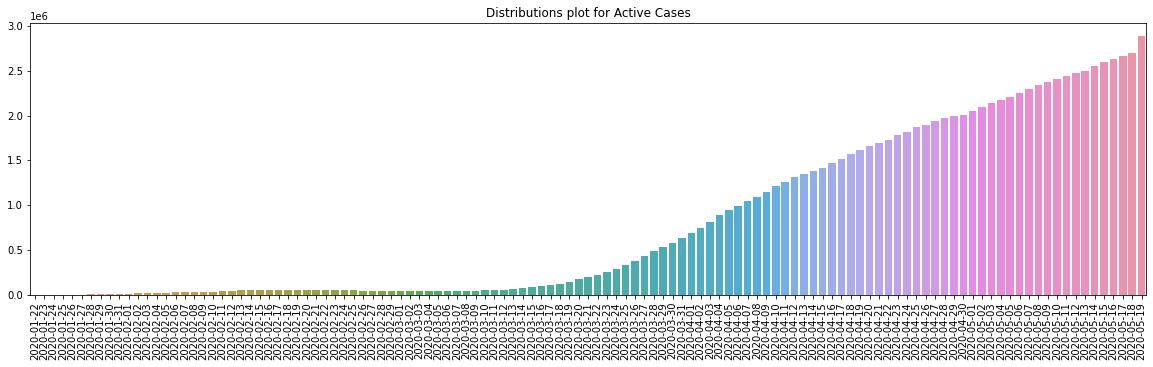

In [0]:
#Visualization 
plt.figure(figsize=(20,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)
plt.show()

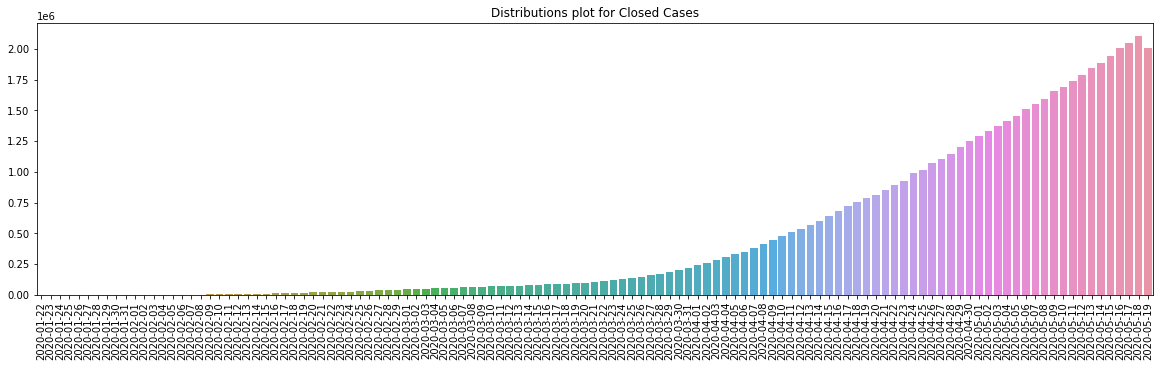

In [0]:
plt.figure(figsize=(20,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distributions plot for Closed Cases")
plt.xticks(rotation=90)
plt.show()

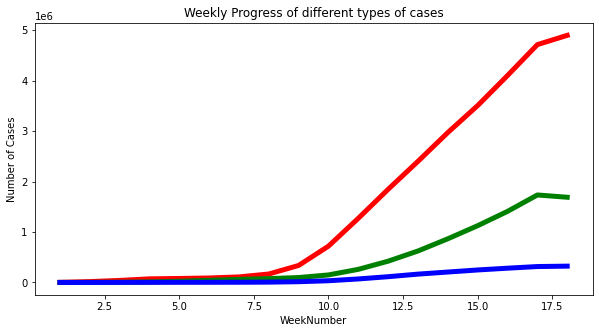

In [0]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths = []
w=1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(10,5))
plt.plot(week_num,weekwise_confirmed,'r',linewidth=5)
plt.plot(week_num,weekwise_recovered,'g',linewidth=5)
plt.plot(week_num,weekwise_deaths,'b',linewidth=5)
plt.xlabel("WeekNumber")
plt.ylabel("Number of Cases")
plt.title("Weekly Progress of different types of cases")
plt.show()

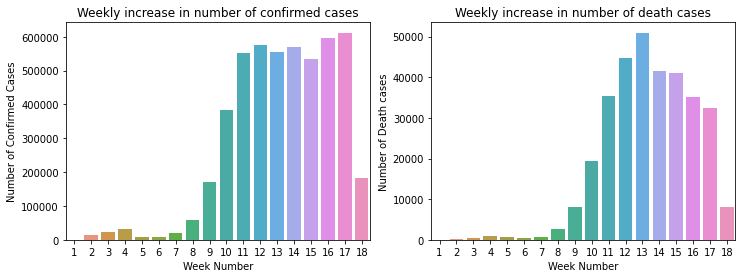

In [0]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death cases")
ax1.set_title("Weekly increase in number of confirmed cases")
ax2.set_title("Weekly increase in number of death cases")
plt.show()

In [0]:
print("Average increase in number of confirmed cases everyday:",
      np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of recovered cases everyday",
      np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of death cases everyday",
      np.round(datewise["Deaths"].diff().fillna(0).mean()))

Average increase in number of confirmed cases everyday: 41151.0
Average increase in number of recovered cases everyday 14190.0
Average increase in number of death cases everyday 2717.0


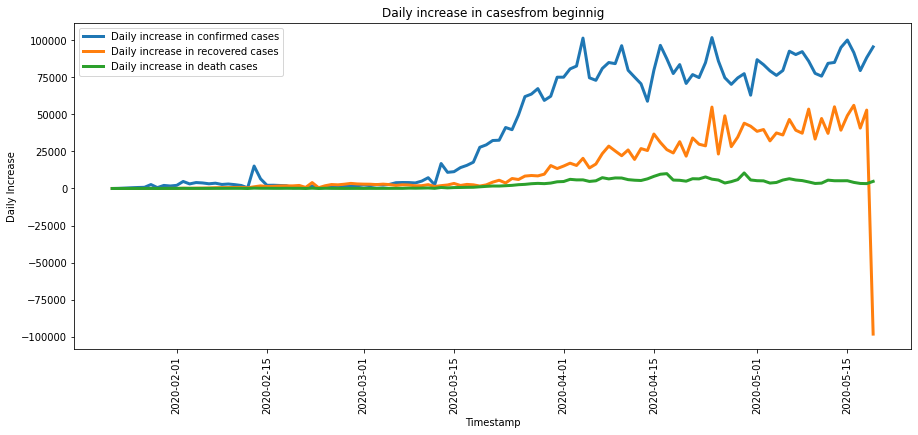

In [0]:
plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increase")
plt.title("Daily increase in casesfrom beginnig")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [0]:
#Countrywise Analysis
#Calculating Country wise Mortality rate
countrywise = covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"] = (countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovered"] = (countrywise["Recovered"]/countrywise["Confirmed"])*100

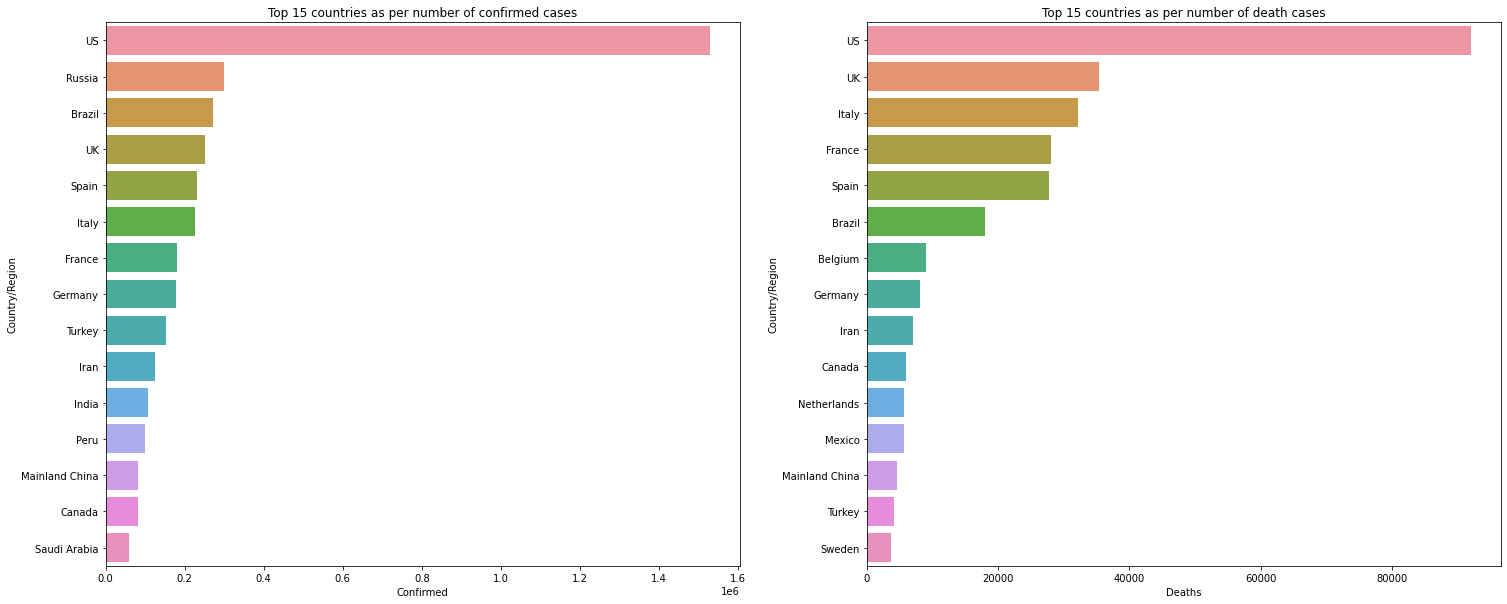

In [0]:
fig,(ax1,ax2) =plt.subplots(1,2,figsize=(25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per number of death cases")
plt.show()

In [0]:
#Data Analysis of INDIA
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum",
                                                   "Recovered":"sum",
                                                   "Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Number of Active Cases",datewise_india["Confirmed"].iloc[-1]-
      datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Number of Closed Cases",
      datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    106475.0
Recovered     42309.0
Deaths         3302.0
Name: 2020-05-19 00:00:00, dtype: float64
Total Number of Active Cases 60864.0
Total Number of Closed Cases 45611.0


In [0]:
#Data Analysis for US
us_data = covid[covid["Country/Region"]=="US"]
datewise_us = us_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum",
                                                   "Recovered":"sum",
                                                   "Deaths":"sum"})
print(datewise_us.iloc[-1])
print("Total Number of Active Cases",datewise_us["Confirmed"].iloc[-1]-
      datewise_us["Recovered"].iloc[-1]-datewise_us["Deaths"].iloc[-1])
print("Total Number of Closed Cases",
      datewise_us["Recovered"].iloc[-1]+datewise_us["Deaths"].iloc[-1])

Confirmed    1528568.0
Recovered     289392.0
Deaths         91921.0
Name: 2020-05-19 00:00:00, dtype: float64
Total Number of Active Cases 1147255.0
Total Number of Closed Cases 381313.0


In [0]:
#Data Analysis for Italy
Italy_data = covid[covid["Country/Region"]=="Italy"]
datewise_italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum",
                                                   "Recovered":"sum",
                                                   "Deaths":"sum"})
print(datewise_italy.iloc[-1])
print("Total Number of Active Cases",datewise_italy["Confirmed"].iloc[-1]-
      datewise_italy["Recovered"].iloc[-1]-datewise_italy["Deaths"].iloc[-1])
print("Total Number of Closed Cases",
      datewise_italy["Recovered"].iloc[-1]+datewise_italy["Deaths"].iloc[-1])

Confirmed    226699.0
Recovered    129401.0
Deaths        32169.0
Name: 2020-05-19 00:00:00, dtype: float64
Total Number of Active Cases 65129.0
Total Number of Closed Cases 161570.0


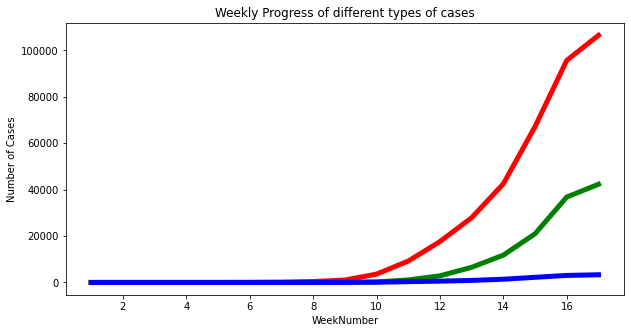

In [0]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india=[]
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths = []
w=1
for i in list(datewise_india["WeekofYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
plt.figure(figsize=(10,5))
plt.plot(week_num_india,india_weekwise_confirmed,'r',linewidth=5)
plt.plot(week_num_india,india_weekwise_recovered,'g',linewidth=5)
plt.plot(week_num_india,india_weekwise_deaths,'b',linewidth=5)
plt.xlabel("WeekNumber")
plt.ylabel("Number of Cases")
plt.title("Weekly Progress of different types of cases")
plt.show()